In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [4]:
comments = pd.read_excel('post_comments.xlsx')
posts = pd.read_excel('post_summary.xlsx')

In [5]:
fp = posts.loc[posts['postedBy'].isin(['Bengaluru Traffic Police', 'Kolkata Traffic Police', 'Hyderabad Traffic Police'])]
fp.head()

,pid,category,postedBy,createdTime,message,likesCount,Unnamed: 6
2937,18281,Government Organization,Bengaluru Traffic Police,2013-12-31T14:48:49+0000,@ 20:20Hrs:Don't DRINK & DRIVE...Call a taxi a...,95,NaN
2938,18282,Government Organization,Bengaluru Traffic Police,2013-12-31T14:40:15+0000,"@ 20:00 Hrs: AVOID surrounding MG road,Brigade...",6,NaN
2939,18283,Government Organization,Bengaluru Traffic Police,2013-12-31T13:49:15+0000,#Bangaloretraffic PEAK HOUR TRAFFIC IS SEEN AT...,8,NaN
2940,18284,Government Organization,Bengaluru Traffic Police,2013-12-31T12:38:05+0000,NaN,108,NaN
2941,18285,Government Organization,Bengaluru Traffic Police,2013-12-31T12:21:56+0000,#Bangaloretraffic PEAK HOUR TRAFFIC IS SEEN AT...,4,NaN


In [6]:
fp.shape

(3502, 7)

In [7]:
print(fp['postedBy'].unique())

['Bengaluru Traffic Police' 'Hyderabad Traffic Police'
 'Kolkata Traffic Police']


In [8]:
fp['bucket'] = pd.to_datetime(fp['createdTime']).dt.round('15min').dt.time
fp['bucket'] = fp['bucket'].apply(lambda time: (time.hour * 60 + time.minute)/15)

<ipython-input-8-eb05559c7a6f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fp['bucket'] = pd.to_datetime(fp['createdTime']).dt.round('15min').dt.time
<ipython-input-8-eb05559c7a6f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fp['bucket'] = fp['bucket'].apply(lambda time: (time.hour * 60 + time.minute)/15)


In [9]:
fp.head()

,pid,category,postedBy,createdTime,message,likesCount,Unnamed: 6,bucket
2937,18281,Government Organization,Bengaluru Traffic Police,2013-12-31T14:48:49+0000,@ 20:20Hrs:Don't DRINK & DRIVE...Call a taxi a...,95,NaN,59.0
2938,18282,Government Organization,Bengaluru Traffic Police,2013-12-31T14:40:15+0000,"@ 20:00 Hrs: AVOID surrounding MG road,Brigade...",6,NaN,59.0
2939,18283,Government Organization,Bengaluru Traffic Police,2013-12-31T13:49:15+0000,#Bangaloretraffic PEAK HOUR TRAFFIC IS SEEN AT...,8,NaN,55.0
2940,18284,Government Organization,Bengaluru Traffic Police,2013-12-31T12:38:05+0000,NaN,108,NaN,51.0
2941,18285,Government Organization,Bengaluru Traffic Police,2013-12-31T12:21:56+0000,#Bangaloretraffic PEAK HOUR TRAFFIC IS SEEN AT...,4,NaN,49.0


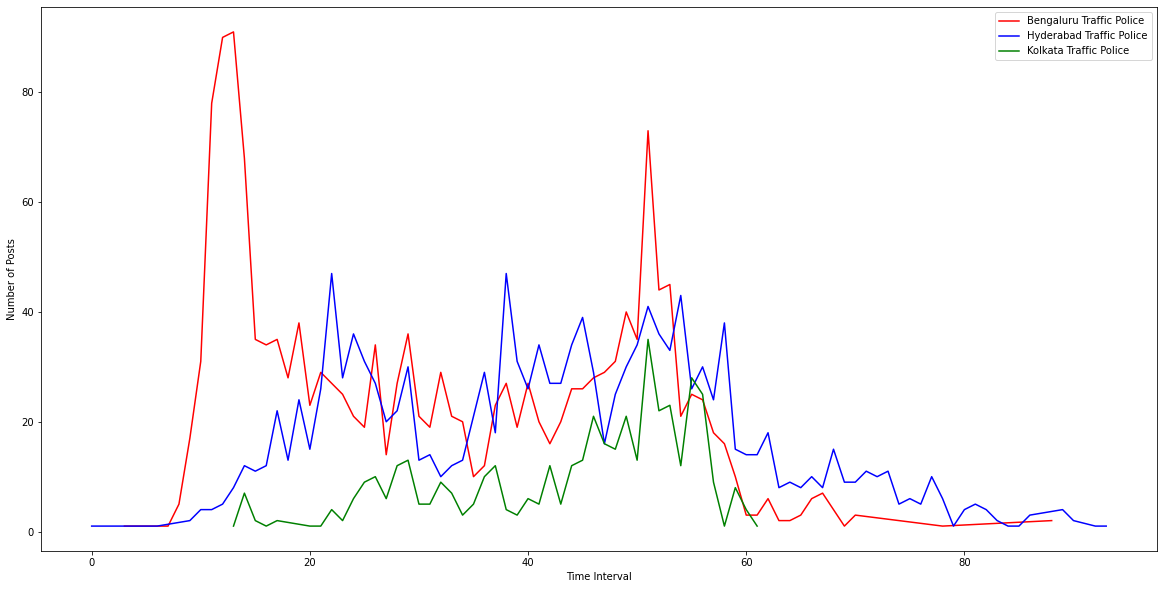

In [45]:
ax = plt.gca()
colors = ['red', 'blue', 'green']
i=0
for postedBy in fp['postedBy'].unique():
    filtered = fp.loc[fp['postedBy'].isin([postedBy])]
    filtered.groupby(['bucket']).size().plot(figsize=(20,10), kind='line', color=colors[i],ax=ax, legend=True, label=postedBy)
    i=i+1;
plt.xlabel('Time Interval')
plt.ylabel('Number of Posts')

#plt.show()
plt.savefig('posts_count_per_traffic_police.png', bbox_inches='tight')

In [39]:
group_by_post_time.head(0)

NameError: name 'group_by_post_time' is not defined